<a href="https://colab.research.google.com/github/Nabila45/university-website-html/blob/main/university_exam_scheduling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Required Libraries**

In [ ]:
!pip install processscheduler
import processscheduler as ps
from datetime import timedelta, datetime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 MB 18.0 MB/s eta 0:00:00


**Defining the Scheduling Problem**

In [35]:
exam_problem = ps.SchedulingProblem(
    name="UniversityExams",
    delta_time=timedelta(hours=1),
    start_time=datetime.now()
)
# We define the scheduling problem representing the university exam session.
# - name: identifier of the problem
# - delta_time: time granularity (1 unit = 1 hour)
# - start_time: real-world starting time of the schedule

**Defining Exam Tasks**

In [ ]:
exam_math = ps.FixedDurationTask(name="MathExam", duration=3)
exam_physics = ps.FixedDurationTask(name="PhysicsExam", duration=2)
exam_cs = ps.FixedDurationTask(name="ComputerScienceExam", duration=3)
exam_economics = ps.FixedDurationTask(name="EconomicsExam", duration=2)
# Each exam is modeled as a FixedDurationTask.
# The duration represents the length of the exam in hours.

**Optional Grading Tasks**

In [ ]:
grading_math = ps.FixedDurationTask(name="GradingMath", duration=2, optional=True)
grading_physics = ps.FixedDurationTask(name="GradingPhysics", duration=2, optional=True)
# Grading tasks are modeled as optional tasks.
# They are scheduled only if constraints allow it.

**Defining Professors (Human Resources)**

In [36]:
prof_alice = ps.Worker(
    name="ProfAlice",
    productivity=1,
    cost=ps.ConstantFunction(value=50)
    )
prof_bob = ps.Worker(
    name="ProfBob",
    productivity=1,
    cost=ps.ConstantFunction(value=60)
    )
prof_charlie = ps.Worker(
    name="ProfCharlie",
    productivity=1,
    cost=ps.ConstantFunction(value=55)
    )


# Each professor has:
# - a cost per hour
# - productivity (used by the optimizer)

**Defining Classrooms**

In [ ]:
room_a = ps.Worker(
    name="RoomA",
    cost=ps.ConstantFunction(value=40)
    )
room_b = ps.Worker(
    name="RoomB",
    cost=ps.ConstantFunction(value=30)
    )
# Classrooms are modeled as resources with a cost.
# Only one exam can use a room at a given time.

**Defining Invigilators (Cumulative Resource)**

In [ ]:
invigilators = ps.CumulativeWorker(
    size=2,
    cost=ps.ConstantFunction(value=70),
    productivity=1
)

# Invigilators are modeled as a cumulative resource.
# size=2 means two invigilators can work in parallel.

**Assigning Resources to Exams**

In [ ]:
exam_math.add_required_resource(
    ps.SelectWorkers(list_of_workers=[prof_alice, prof_bob], nb_workers_to_select=1)
)
exam_math.add_required_resource(
    ps.SelectWorkers(list_of_workers=[room_a, room_b], nb_workers_to_select=1)
)
exam_math.add_required_resource(invigilators)
# Math exam requires:
# - one professor (Alice or Bob)
# - one classroom (Room A or B)
# - invigilators


Physics Exam

In [ ]:
exam_physics.add_required_resource(
    ps.SelectWorkers(list_of_workers=[prof_bob, prof_charlie], nb_workers_to_select=1)
)
exam_physics.add_required_resource(
    ps.SelectWorkers(list_of_workers=[room_a, room_b], nb_workers_to_select=1)
)
exam_physics.add_required_resource(invigilators)

Economics Exam

In [ ]:
exam_economics.add_required_resource(prof_bob)
exam_economics.add_required_resource(room_b)
exam_economics.add_required_resource(invigilators)

Defining Constraints

In [ ]:
ps.TasksDontOverlap(task_1=exam_math, task_2=exam_physics)
# Math and Physics share students,
# therefore they must not be scheduled at the same time.

name='TasksDontOverlap_31561787' type='TasksDontOverlap' optional=False task_1=name='MathExam' type='FixedDurationTask' optional=False work_amount=0 release_date=None due_date=None due_date_is_deadline=True priority=1 duration=3 task_2=name='PhysicsExam' type='FixedDurationTask' optional=False work_amount=0 release_date=None due_date=None due_date_is_deadline=True priority=1 duration=2

Grading After Exams

In [ ]:
ps.TaskPrecedence(task_before=exam_math, task_after=grading_math)
ps.TaskPrecedence(task_before=exam_physics, task_after=grading_physics)

name='TaskPrecedence_11952695' type='TaskPrecedence' optional=False task_before=name='PhysicsExam' type='FixedDurationTask' optional=False work_amount=0 release_date=None due_date=None due_date_is_deadline=True priority=1 duration=2 task_after=name='GradingPhysics' type='FixedDurationTask' optional=True work_amount=0 release_date=None due_date=None due_date_is_deadline=True priority=1 duration=2 offset=0 kind='lax'

Defining Optimization Objectives
Minimize Total Exam Period (Makespan)

In [ ]:
ps.ObjectiveMinimizeMakespan(
    name="MinimizeExamSessionDuration"
    )


name='MinimizeMakeSpan' type='ObjectiveMinimizeMakespan' target=horizon weight=1 kind='minimize'

Minimize Resource Usage Cost

In [37]:
ps.ObjectiveMinimizeResourceCost(
    list_of_resources=[
        prof_alice,
        prof_bob,
        prof_charlie,
        room_a,
        room_b]
)


name='MinimizeResourceCostProfAliceProfBobProfCharlieRoomARoomB' type='ObjectiveMinimizeResourceCost' target=name='Total Cost (ProfAlice,ProfBob,ProfCharlie,RoomA,RoomB)' type='IndicatorResourceCost' bounds=None list_of_resources=[name='ProfAlice' type='Worker' productivity=1 cost=name='ConstantFunction_77280852' type='ConstantFunction' value=50, name='ProfBob' type='Worker' productivity=1 cost=name='ConstantFunction_13173643' type='ConstantFunction' value=60, name='ProfCharlie' type='Worker' productivity=1 cost=name='ConstantFunction_19908333' type='ConstantFunction' value=55, name='RoomA' type='Worker' productivity=1 cost=name='ConstantFunction_56718433' type='ConstantFunction' value=40, name='RoomB' type='Worker' productivity=1 cost=name='ConstantFunction_16248356' type='ConstantFunction' value=30] weight=1 kind='minimize'

Balance Professor Workload

In [ ]:
ps.ObjectiveMaximizeResourceUtilization(
    resource=prof_alice
    )


name='MaximizeResourceUtilization' type='ObjectiveMaximizeResourceUtilization' target=name='Utilization (ProfAlice)' type='IndicatorResourceUtilization' bounds=(0, 100) resource=name='ProfAlice' type='Worker' productivity=1 cost=name='ConstantFunction_32247199' type='ConstantFunction' value=50 weight=1 kind='maximize'

Prioritize Core Exams

In [ ]:
ps.ObjectivePriorities(
    tasks_with_priorities={
        exam_math: 3,
        exam_cs: 3,
        exam_physics: 2,
        exam_economics: 1
    }
)


name='MinimizePriority' type='ObjectivePriorities' target=name='TotalPriority' type='IndicatorFromMathExpression' bounds=None expression=MathExam_end*1 +
PhysicsExam_end*1 +
ComputerScienceExam_end*1 +
EconomicsExam_end*1 +
If(GradingMath_scheduled, GradingMath_end*1, 0) +
If(GradingPhysics_scheduled, GradingPhysics_end*1, 0) weight=1 kind='minimize'

Solving the Scheduling Problem

In [ ]:
solver = ps.SchedulingSolver(problem=exam_problem)
solution = solver.solve()
print(solution)

# The solver uses an SMT-based optimizer (Z3)
# to find a schedule satisfying all constraints
# and optimizing the defined objectives.

Solver type:
===========

-> Standard SAT/SMT solver

Objectives:
        ======

MinimizeMakeSpan

MinimizeResourceCostProfAliceProfBobProfCharlieRoomARoomB

MaximizeResourceUtilization

MinimizePriority

MinimizeEquivalentObjective

Incremental optimizer:
======================

Found value: 656 elapsed time:0.049s

Checking better value < 656

Found value: 655 elapsed time:0.135s

Checking better value < 655

Found value: 650 elapsed time:0.160s

Checking better value < 650

Found value: 649 elapsed time:0.161s

Checking better value < 649

Found value: 648 elapsed time:0.165s

Checking better value < 648

Found value: 647 elapsed time:0.167s

Checking better value < 647

Found value: 645 elapsed time:0.365s

Checking better value < 645

Found value: 644 elapsed time:0.395s

Checking better value < 644

Found value: 642 elapsed time:0.765s

Checking better value < 642

Found value: 641 elapsed time:0.794s

Checking better value < 641

Found value: 640 elapsed time:0.815s

Checking better value < 640

Can't find a better solution for problem UniversityExams.

Found optimum 640. Stopping iteration.

total number of iterations: 12

value: 640

UniversityExams satisfiability checked in 0.82s

             Task name                              Allocated Resources  \
0             MathExam    [ProfAlice, RoomB, CumulativeWorker_18980063]   
1          PhysicsExam  [ProfCharlie, RoomB, CumulativeWorker_18980063]   
2  ComputerScienceExam                                               []   
3        EconomicsExam      [ProfBob, RoomB, CumulativeWorker_18980063]   
4          GradingMath                                               []   
5       GradingPhysics                                               []   

   Start  End  Duration  Scheduled  Tardy  
0      4    7         3       True  False  
1      0    2         2       True  False  
2      0    3         3       True  False  
3      2    4         2       True  False  
4     -5   -5         2      False  False  
5     -6   -6         2      False  False  


Visualizing the Schedule

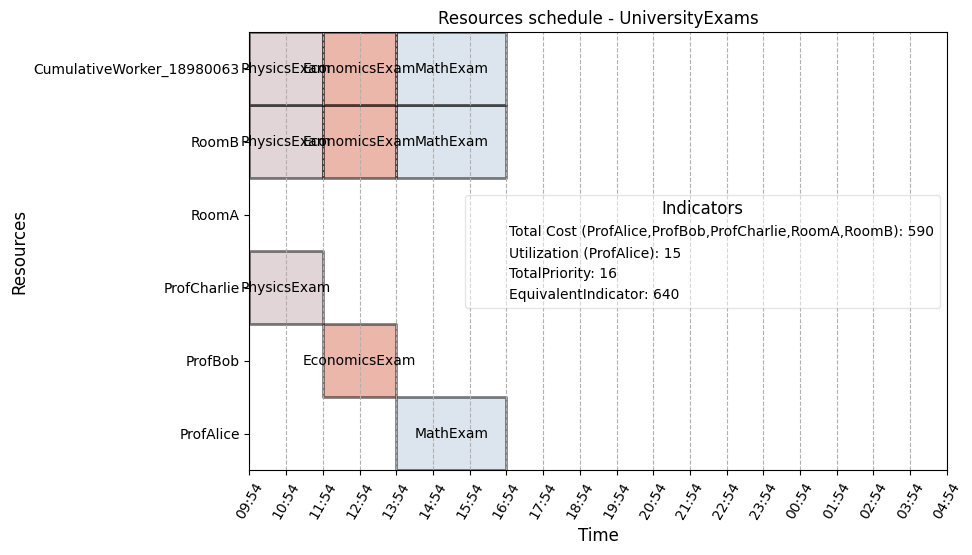

In [ ]:
ps.render_gantt_matplotlib(solution=solution)


In [ ]:
ps.render_gantt_plotly(solution=solution, render_mode="Resource")
